In [136]:
# Task 01 Part (a) Data Understanding : Identify and replace null values.

In [137]:
# Import the necessary libraries

!pip install plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import sqlite3
import seaborn as sns

from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Load the bank_transactions.csv dataset into a dataframe.

banktransactionsdf = pd.read_csv('C:/Users/Annmo/Desktop/bank_transactions.csv')

# Display the first ten rows of the "banktransactionsdf" to understand the structure of the dataset.

banktransactionsdf.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50
5,T6,C1536588,8/10/72,F,ITANAGAR,53609.20,2/8/16,173940,676.00
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.00
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148.00
8,T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/16,192825,833.00
9,T10,C6638934,22/6/84,M,MUMBAI,4279.22,2/8/16,192446,289.11


In [138]:
# Overview of the dataset
banktransactionsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [139]:
# Converting CustomerDOB and TransactionDate to datetime format

banktransactionsdf['CustomerDOB'] = pd.to_datetime(banktransactionsdf['CustomerDOB'])
banktransactionsdf['TransactionDate'] = pd.to_datetime(banktransactionsdf['TransactionDate'])

banktransactionsdf.info()

C:\Users\Annmo\AppData\Local\Temp\ipykernel_17676\2590987328.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banktransactionsdf['CustomerDOB'] = pd.to_datetime(banktransactionsdf['CustomerDOB'])
C:\Users\Annmo\AppData\Local\Temp\ipykernel_17676\2590987328.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banktransactionsdf['TransactionDate'] = pd.to_datetime(banktransactionsdf['TransactionDate'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1048567 non-null  object        
 1   CustomerID               1048567 non-null  object        
 2   CustomerDOB              1045170 non-null  datetime64[ns]
 3   CustGender               1047467 non-null  object        
 4   CustLocation             1048416 non-null  object        
 5   CustAccountBalance       1046198 non-null  float64       
 6   TransactionDate          1048567 non-null  datetime64[ns]
 7   TransactionTime          1048567 non-null  int64         
 8   TransactionAmount (INR)  1048567 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 72.0+ MB


In [140]:
# Remove duplicate rows
banktransactionsdf = banktransactionsdf.drop_duplicates()

# Verify the shape of the dataframe after removing duplicates
banktransactionsdf.shape

(1048567, 9)

In [141]:
# Identify all missing values.

banktransactionsdf.isna().sum() # Provides a count of null / missing values in each column.

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [142]:
# Calculating the percentage of null values relative to the number of rows in the dataset.

banktransactionsdf.isna().sum()/len(banktransactionsdf)*100

TransactionID              0.000000
CustomerID                 0.000000
CustomerDOB                0.323966
CustGender                 0.104905
CustLocation               0.014401
CustAccountBalance         0.225927
TransactionDate            0.000000
TransactionTime            0.000000
TransactionAmount (INR)    0.000000
dtype: float64

In [143]:
# Replacing the null values in columns CustomerDOB, CustGender, CustLocation

# Replace the 3397 null values in CustomerDOB with the median date
mediandob = banktransactionsdf['CustomerDOB'].median()  # Get the median date
banktransactionsdf['CustomerDOB'] = banktransactionsdf['CustomerDOB'].fillna(mediandob)

# Replace the 1100 null values in CustGender with the mode
modegender = banktransactionsdf['CustGender'].mode()[0]
banktransactionsdf['CustGender'] = banktransactionsdf['CustGender'].fillna(modegender)

# Replace the 151 null values in CustLocation with the mode
modelocation = banktransactionsdf['CustLocation'].mode()[0]
banktransactionsdf['CustLocation'] = banktransactionsdf['CustLocation'].fillna(modelocation)

# Replace the 2369 null values in CustAccountBalance with the median
meanbalance = banktransactionsdf['CustAccountBalance'].mean()
banktransactionsdf['CustAccountBalance'] = banktransactionsdf['CustAccountBalance'].fillna(meanbalance)

# Verify by checking the number of null values in each column after replacement
banktransactionsdf.isnull().sum()


TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [144]:
# Task 01 Part (b) Data Understanding : Identify and replace invalid transactions.

In [145]:
banktransactionsdf = banktransactionsdf.rename(columns={'TransactionAmount (INR)': 'TransactionAmount'})

# Filter for negative values or zero transaction amounts
invalidtransactions = banktransactionsdf[(banktransactionsdf['TransactionAmount'] <= 0)]

# Count the number of invalid transactions
countinvalidtransactions = len(invalidtransactions)

# Display the count of invalid transactions using the F-String function
print(f"Number of rows with invalid transaction amounts : {countinvalidtransactions}")

Number of rows with invalid transaction amounts : 835


In [146]:
# Calculate the mean of valid TransactionAmount values (greater than 0)
valid_transaction_mean = banktransactionsdf[banktransactionsdf['TransactionAmount'] > 0]['TransactionAmount'].mean()

# Replace invalid TransactionAmount values (<= 0) with the mean
banktransactionsdf['TransactionAmount'] = banktransactionsdf['TransactionAmount']

# Check the shape of the modified DataFrame to see if all the data records are still intact.
banktransactionsdf.shape

(1048567, 9)

In [147]:
# Task 01 Part (c) Data Understanding : Identify and remove or replace invalid age values.

In [148]:
# Fix 2-digit years to 4-digit years
mask_2digit_year = banktransactionsdf['CustomerDOB'].dt.year < 100  # Find 2-digit years
banktransactionsdf.loc[mask_2digit_year, 'CustomerDOB'] = banktransactionsdf.loc[mask_2digit_year, 'CustomerDOB'].apply(
    lambda x: x.replace(year=1900 + x.year) if x.year < 100 else x
)

# Identify invalid dates (outside 1946-1998)
invalid_dates = ~((banktransactionsdf['CustomerDOB'].dt.year >= 1946) & 
                  (banktransactionsdf['CustomerDOB'].dt.year <= 1998))

# Count invalid transactions
invalid_count = invalid_dates.sum()  # Total number of invalid transactions
total_count = len(banktransactionsdf)  # Total number of transactions
invalid_percentage = (invalid_count / total_count) * 100  # Percentage of invalid transactions

# Output invalid counts and percentages
print(f"Total invalid transactions: {invalid_count}")
print(f"Percentage of invalid transactions: {invalid_percentage:.2f}%")


Total invalid transactions: 153251
Percentage of invalid transactions: 14.62%


In [149]:
# Calculate median date for valid rows
median_date = banktransactionsdf.loc[~invalid_dates, 'CustomerDOB'].median()

# Replace invalid dates with the median date
banktransactionsdf.loc[invalid_dates, 'CustomerDOB'] = median_date

# Verify replacements
banktransactionsdf['CustomerDOB'].head(10)


0   1994-10-01
1   1988-07-02
2   1996-11-26
3   1988-07-02
4   1988-03-24
5   1988-07-02
6   1992-01-26
7   1982-01-27
8   1988-04-19
9   1984-06-22
Name: CustomerDOB, dtype: datetime64[ns]

In [150]:
# Check the shape of the modified DataFrame to see if all the data records are still intact.
banktransactionsdf.shape

(1048567, 9)

In [151]:
# Task 01 Part (d) Data Understanding : Display top 05 locations where maximum number of transactions occured.

In [152]:
# Group by 'CustLocation' and count the number of transactions
toplocations = banktransactionsdf['CustLocation'].value_counts().head(5).reset_index()
toplocations.columns = ['CustLocation', 'Transaction Count']

# Print the result
toplocations

,CustLocation,Transaction Count
0,MUMBAI,103746
1,NEW DELHI,84928
2,BANGALORE,81555
3,GURGAON,73818
4,DELHI,71019


C:\Users\Annmo\AppData\Local\Temp\ipykernel_17676\1242291638.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


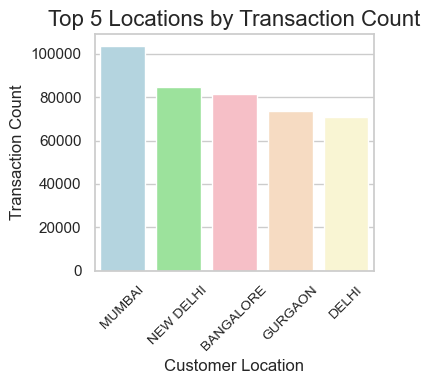

In [153]:
sns.set_theme(style="whitegrid")

# Define the pastel color palette
pastel_colors = ['#ADD8E6', '#90EE90', '#FFB6C1', '#FFDAB9', '#FFFACD']  # Light blue, green, pink, peach, yellow

# Create the bar chart
plt.figure(figsize=(4, 4))
sns.barplot(
    data=toplocations,
    x='CustLocation',
    y='Transaction Count',
    palette=pastel_colors
)

# Add chart labels and title
plt.title('Top 5 Locations by Transaction Count', fontsize=16)
plt.xlabel('Customer Location', fontsize=12)
plt.ylabel('Transaction Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout() # prevents overlapping

# Show the plot
plt.show()


In [154]:
# Task 02 Part (a) RFM Segmentation : Write a query to define and calculate RFM values per Customer.

In [155]:
banktransactionsdf = banktransactionsdf.rename(columns={'TransactionAmount (INR)': 'TransactionAmount'})

In [156]:
# Create a connection to database
conn = sqlite3.connect('RFMdb')

# Create a cursor object
cursor = conn.cursor()

# Load the bank transactions data into the RFMdb database
banktransactionsdf.to_sql("rfmtransactionsdata", conn, if_exists='replace')

# Check if the data was inserted into the database
rfmtransactionsdataframe = pd.read_sql('SELECT * FROM rfmtransactionsdata', conn)
rfmtransactionsdataframe.head()

,index,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount
0,0,T1,C5841053,1994-10-01 00:00:00,F,JAMSHEDPUR,17819.05,2016-02-08 00:00:00,143207,25.0
1,1,T2,C2142763,1988-07-02 00:00:00,M,JHAJJAR,2270.69,2016-02-08 00:00:00,141858,27999.0
2,2,T3,C4417068,1996-11-26 00:00:00,F,MUMBAI,17874.44,2016-02-08 00:00:00,142712,459.0
3,3,T4,C5342380,1988-07-02 00:00:00,F,MUMBAI,866503.21,2016-02-08 00:00:00,142714,2060.0
4,4,T5,C9031234,1988-03-24 00:00:00,F,NAVI MUMBAI,6714.43,2016-02-08 00:00:00,181156,1762.5


In [157]:
rfmscoredataframe = pd.read_sql(''' SELECT CustomerID, RfmRecencyScore, RfmFrequencyScore, RfmMonetaryScore, RfmRecencyScore*100 + RfmFrequencyScore*10 + RfmMonetaryScore AS RfmCombinedScore
    FROM
     ( SELECT CustomerID,
             NTILE(4) OVER (ORDER BY MAX(TransactionDate)) AS RfmRecencyScore,
             NTILE(4) OVER (ORDER BY COUNT(TransactionID)) AS RfmFrequencyScore,
             NTILE(4) OVER (ORDER BY SUM(TransactionAmount)) AS RfmMonetaryScore
      FROM
            rfmtransactionsdata
            GROUP BY CustomerID
            )
 ''', conn)

rfmscoredataframe

,CustomerID,RfmRecencyScore,RfmFrequencyScore,RfmMonetaryScore,RfmCombinedScore
0,C3097032,1,1,1,111
1,C3647149,1,1,1,111
2,C5433786,1,1,1,111
3,C5597058,1,1,1,111
4,C5816089,1,1,1,111
...,...,...,...,...,...
884260,C8024043,4,4,4,444
884261,C2139974,4,4,4,444
884262,C6735477,4,4,4,444
884263,C6222360,4,4,4,444


In [158]:
def CustomerSegment(rfmscoredataframe):
    if ((rfmscoredataframe['RfmRecencyScore'] >= 4) and (rfmscoredataframe['RfmFrequencyScore'] >= 4)
        and (rfmscoredataframe['RfmMonetaryScore'] >= 4)):
        return 'Elite Client'
    elif ((rfmscoredataframe['RfmRecencyScore'] >= 3) and (rfmscoredataframe['RfmFrequencyScore'] >= 3)
          and (rfmscoredataframe['RfmMonetaryScore'] >= 3)):
        return 'Regular Client'
    elif ((rfmscoredataframe['RfmRecencyScore'] >= 3) and (rfmscoredataframe['RfmFrequencyScore'] >= 1)
          and (rfmscoredataframe['RfmMonetaryScore'] >= 2)):
        return 'Opportune Client'
    elif ((rfmscoredataframe['RfmRecencyScore'] >= 3) and (rfmscoredataframe['RfmFrequencyScore'] >= 1)
          and (rfmscoredataframe['RfmMonetaryScore'] >= 1)):
        return 'Emerging Client'
    elif ((rfmscoredataframe['RfmRecencyScore'] >= 2) and (rfmscoredataframe['RfmFrequencyScore'] >= 2)
          and (rfmscoredataframe['RfmMonetaryScore'] >= 2)):
        return 'At Risk Client'
    elif ((rfmscoredataframe['RfmRecencyScore'] >= 1) and (rfmscoredataframe['RfmFrequencyScore'] >= 2)
          and (rfmscoredataframe['RfmMonetaryScore'] >= 2)):
        return 'Declining Client'
    elif ((rfmscoredataframe['RfmRecencyScore'] >= 1) and (rfmscoredataframe['RfmFrequencyScore'] >= 1)
          and (rfmscoredataframe['RfmMonetaryScore'] >= 2)):
        return 'Occasional Client'
    else:
        return 'Dormant Account'

rfmscoredataframe['CustomerSegment'] = rfmscoredataframe.apply(CustomerSegment, axis=1)

rfmscoredataframe


,CustomerID,RfmRecencyScore,RfmFrequencyScore,RfmMonetaryScore,RfmCombinedScore,CustomerSegment
0,C3097032,1,1,1,111,Dormant Account
1,C3647149,1,1,1,111,Dormant Account
2,C5433786,1,1,1,111,Dormant Account
3,C5597058,1,1,1,111,Dormant Account
4,C5816089,1,1,1,111,Dormant Account
...,...,...,...,...,...,...
884260,C8024043,4,4,4,444,Elite Client
884261,C2139974,4,4,4,444,Elite Client
884262,C6735477,4,4,4,444,Elite Client
884263,C6222360,4,4,4,444,Elite Client


In [159]:
# Close the SQLite connection
conn.close()

In [160]:
# Calculate recency by finding the difference between current_date and the last transaction date for each customer

# Get current date
from datetime import datetime
current_date = datetime.now()

rfmdataframe = banktransactionsdf.groupby('CustomerID').agg(
    Recency=('TransactionDate', 'max'),
    Frequency=('TransactionID', 'count'),
    Monetary=('TransactionAmount', 'sum')
).reset_index()

# Calculate the recency in days (difference between the most recent transaction date and the current date)
rfmdataframe['Recency'] = (current_date - rfmdataframe['Recency']).dt.days

# Sort the RFM data by 'CustomerID' (or use any other column you need to sort by)
rfmdataframe = rfmdataframe.sort_values(by='CustomerID')

# Display the first few rows of the RFM data
rfmdataframe.head(10)

,CustomerID,Recency,Frequency,Monetary
0,C1010011,2985,2,5106.0
1,C1010012,3028,1,1499.0
2,C1010014,3065,2,1455.0
3,C1010018,2996,1,30.0
4,C1010024,3024,1,5000.0
5,C1010028,3013,1,557.0
6,C1010031,3156,2,1864.0
7,C1010035,3015,2,750.0
8,C1010036,3016,1,208.0
9,C1010037,3003,1,19680.0


In [161]:
rfmdataframe.shape

(884265, 4)

In [162]:
# Task 02 Part (b) RFM Segmentation : Check the distribution of Recency, Frequency & Monetory Values.

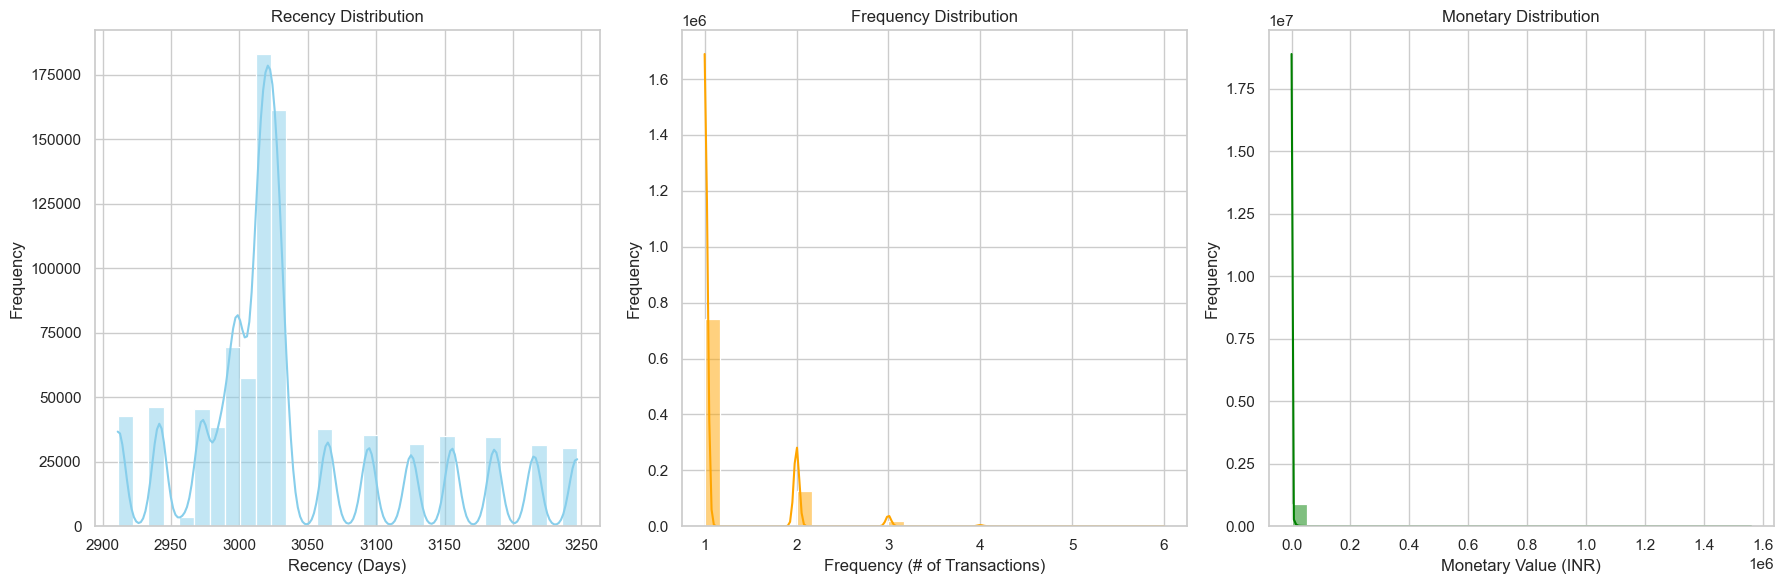

In [163]:
# Set style for the plots
sns.set(style="whitegrid")

# Create subplots for Recency, Frequency, and Monetary
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Recency Distribution
sns.histplot(rfmdataframe['Recency'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Recency (Days)')
axes[0].set_ylabel('Frequency')

# Frequency Distribution
sns.histplot(rfmdataframe['Frequency'], bins=30, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Frequency (# of Transactions)')
axes[1].set_ylabel('Frequency')

# Monetary Distribution
sns.histplot(rfmdataframe['Monetary'], bins=30, kde=True, ax=axes[2], color='green')
axes[2].set_title('Monetary Distribution')
axes[2].set_xlabel('Monetary Value (INR)')
axes[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [164]:
# Task 02 Part (c) RFM Segmentation : Check and remove skewness from the data.

In [165]:
# Check if there are any negative values in the Recency, Frequency, or Monetary columns
negative_recency = (rfmdataframe['Recency'] < 0).any()
negative_frequency = (rfmdataframe['Frequency'] < 0).any()
negative_monetary = (rfmdataframe['Monetary'] < 0).any()

# Display the results
print(f"Negative values in Recency: {negative_recency}")
print(f"Negative values in Frequency: {negative_frequency}")
print(f"Negative values in Monetary: {negative_monetary}")


Negative values in Recency: False
Negative values in Frequency: False
Negative values in Monetary: False


In [166]:
# Checking skewness of the RFM values
skewness = rfmdataframe[['Recency', 'Frequency', 'Monetary']].skew()

# Display skewness
print(skewness)

Recency       1.020213
Frequency     2.601673
Monetary     42.833930
dtype: float64


In [167]:
# Apply log transformation to remove skewness
rfmdataframe['LogRecency'] = np.log(rfmdataframe['Recency'] + 1)  # Add 1 to avoid log(0)
rfmdataframe['LogFrequency'] = np.log(rfmdataframe['Frequency'] + 1)  # Add 1 to avoid log(0)
rfmdataframe['LogMonetary'] = np.log(rfmdataframe['Monetary'] + 1)  # Add 1 to avoid log(0)

# Check skewness after log transformation
skewness_after_log = rfmdataframe[['LogRecency', 'LogFrequency', 'LogMonetary']].skew()

# Display the skewness after log transformation
print(skewness_after_log)


LogRecency      0.961820
LogFrequency    2.193507
LogMonetary    -0.212600
dtype: float64


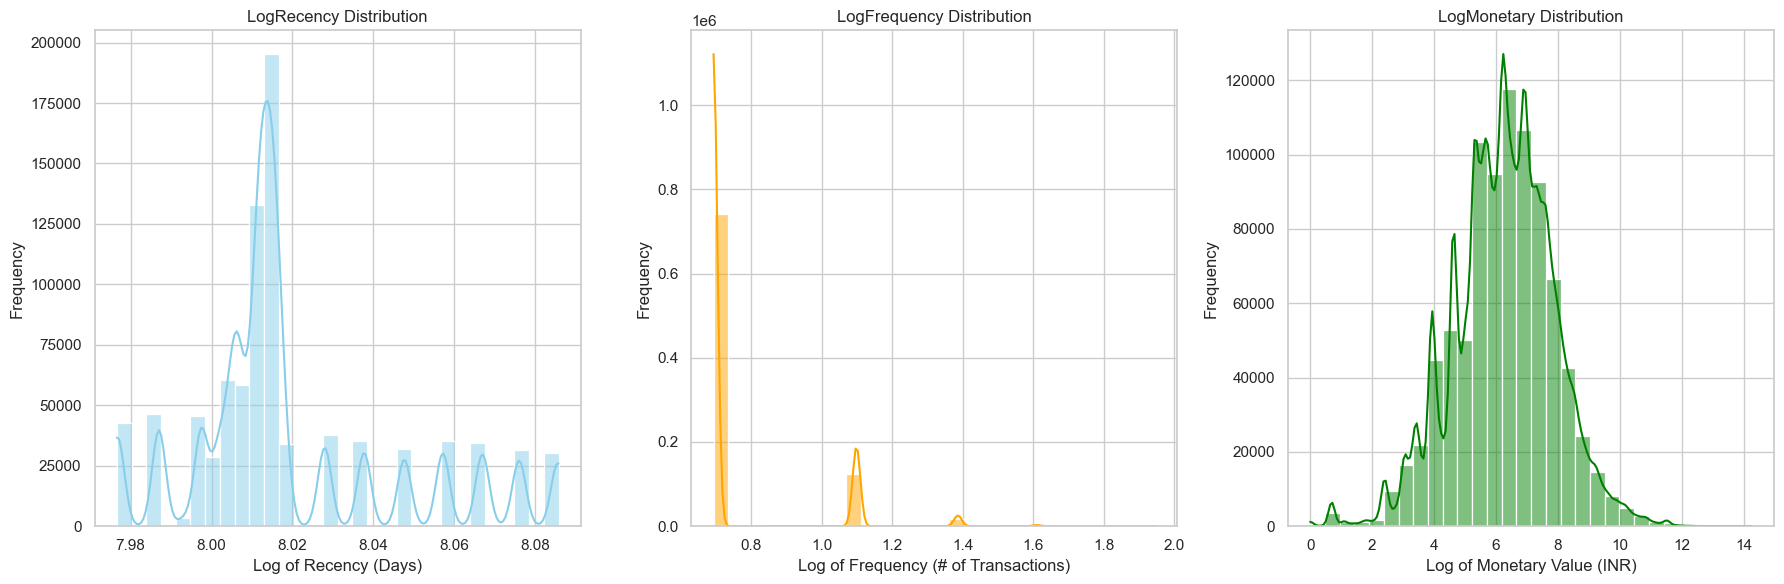

In [168]:
# Set style for the plots
sns.set(style="whitegrid")

# Create subplots for LogRecency, LogFrequency, and LogMonetary
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# LogRecency Distribution
sns.histplot(rfmdataframe['LogRecency'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('LogRecency Distribution')
axes[0].set_xlabel('Log of Recency (Days)')
axes[0].set_ylabel('Frequency')

# LogFrequency Distribution
sns.histplot(rfmdataframe['LogFrequency'], bins=30, kde=True, ax=axes[1], color='orange')
axes[1].set_title('LogFrequency Distribution')
axes[1].set_xlabel('Log of Frequency (# of Transactions)')
axes[1].set_ylabel('Frequency')

# LogMonetary Distribution
sns.histplot(rfmdataframe['LogMonetary'], bins=30, kde=True, ax=axes[2], color='green')
axes[2].set_title('LogMonetary Distribution')
axes[2].set_xlabel('Log of Monetary Value (INR)')
axes[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [169]:
# Task 03 Part (c) RFM Segmentation : Implement K-means clustering to divide the customer list into tiered groups to each of the 03 deminsions R. F & M.

In [170]:
# Prior to clustering, the optimum K value will be determined by using 3 methods : Elbow Method, Gap Statistic & Silhouette Score.

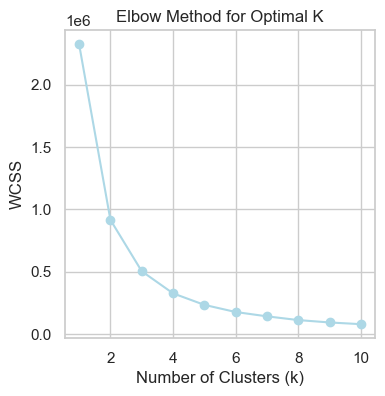

In [171]:
# K Determinant Method (01) : Elbow Method

from sklearn.cluster import KMeans

X = rfmdataframe[['LogRecency', 'LogFrequency', 'LogMonetary']]

# List to store WCSS (Within-Cluster Sum of Squares) for each k
wcss = []

# Try different k values
for k in range(1, 11):  # Trying k values from 1 to 10
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph with light blue color
plt.figure(figsize=(4, 4))
plt.plot(range(1, 11), wcss, color='lightblue', marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [172]:
# Finding optimal k from Elbow Method by largest drop in WCSS
wcss_diff = np.diff(wcss)  # Calculate the difference between consecutive WCSS values
optimal_k_elbow = np.argmin(wcss_diff) + 2  # Add 2 because np.diff reduces the length by 1
print(f"Optimal k (Elbow Method): {optimal_k_elbow}")

Optimal k (Elbow Method): 2


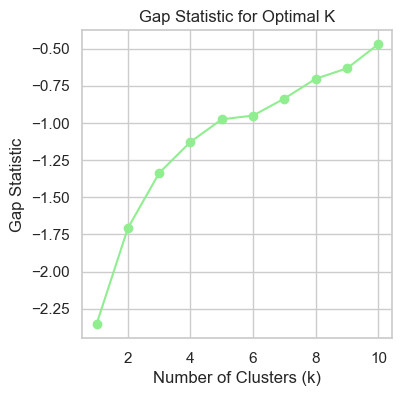

In [173]:
# K Determinant Method (02) : Gap Statstic Method

def gap_statistic(X, n_refs=10, max_k=10):
    gaps = np.zeros(max_k)
    for k in range(1, max_k + 1):
        # Fit KMeans
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
        Wk = kmeans.inertia_

        # Generate random data and fit KMeans
        random_data = np.random.rand(*X.shape)
        reference_inertia = np.zeros(n_refs)
        for i in range(n_refs):
            random_kmeans = KMeans(n_clusters=k, random_state=42).fit(random_data)
            reference_inertia[i] = random_kmeans.inertia_

        # Compute the gap statistic
        gap = np.log(np.mean(reference_inertia)) - np.log(Wk)
        gaps[k-1] = gap

    return gaps

# Calculate Gap Statistic for different values of k
gaps = gap_statistic(X, max_k=10)

# Plot Gap Statistic with light green color
plt.figure(figsize=(4, 4))
plt.plot(range(1, 11), gaps, marker='o', color='lightgreen')
plt.title('Gap Statistic for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Gap Statistic')
plt.show()

In [174]:
# Finding optimal k from Gap Statistic by maximum Gap
optimal_k_gap = np.argmax(gaps) + 1  # Add 1 to account for 0-based indexing
print(f"Optimal k (Gap Statistic): {optimal_k_gap}")

Optimal k (Gap Statistic): 10


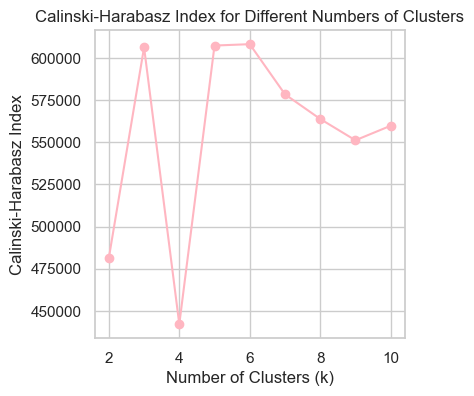

The optimal number of clusters is: 6


In [175]:
# K Determinant Method (03) : Calinski-Harabasz Index

# Selecting RFM columns (ensure column names match your dataset)
CHIrfmdata = rfmdataframe[['LogRecency', 'LogFrequency', 'LogMonetary']]

# Standardize the data to bring all variables to the same scale
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(CHIrfmdata)

# Initialize lists to store results
calinski_harabasz_scores = []
k_values = range(2, 11)  # Test for k from 2 to 10

# Perform K-Means clustering for different k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(rfm_scaled)
    score = calinski_harabasz_score(rfm_scaled, cluster_labels)
    calinski_harabasz_scores.append(score)

# Plot the Calinski-Harabasz Index
plt.figure(figsize=(4, 4))
plt.plot(k_values, calinski_harabasz_scores, marker='o', color='lightpink')
plt.title("Calinski-Harabasz Index for Different Numbers of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Calinski-Harabasz Index")
plt.grid(True)
plt.show()

# Print the optimal k (the one with the highest CH score)
optimal_k_chi = k_values[calinski_harabasz_scores.index(max(calinski_harabasz_scores))]
print(f"The optimal number of clusters is: {optimal_k_chi}")


In [176]:
# Create a dictionary for the DataFrame
k_values_dict = {
    "K Value Method": ["Elbow Method", "Gap Statistic", "Calinski-Harabasz Index"],
    "K Value": [optimal_k_elbow, optimal_k_gap, optimal_k_chi]
}

# Create the DataFrame
k_values_df = pd.DataFrame(k_values_dict)

# Print the DataFrame
print("K-Values by Method:")
print(k_values_df)

K-Values by Method:
            K Value Method  K Value
0             Elbow Method        2
1            Gap Statistic       10
2  Calinski-Harabasz Index        6


In [177]:
from sklearn.cluster import KMeans

# Assuming `rfm_scaled` is your standardized RFM dataset
# Perform K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
rfm_clusters = kmeans.fit_predict(rfm_scaled)

# Add the cluster labels to the original RFM DataFrame
rfmdataframe['Cluster'] = rfm_clusters

# Print the first few rows of the updated RFM DataFrame
print("RFM Data with Cluster Labels:")
rfmdataframe.head(10)

RFM Data with Cluster Labels:


,CustomerID,Recency,Frequency,Monetary,LogRecency,LogFrequency,LogMonetary,Cluster
0,C1010011,2985,2,5106.0,8.001690,1.098612,8.538367,2
1,C1010012,3028,1,1499.0,8.015988,0.693147,7.313220,1
2,C1010014,3065,2,1455.0,8.028129,1.098612,7.283448,2
3,C1010018,2996,1,30.0,8.005367,0.693147,3.433987,0
4,C1010024,3024,1,5000.0,8.014666,0.693147,8.517393,4
5,C1010028,3013,1,557.0,8.011023,0.693147,6.324359,1
6,C1010031,3156,2,1864.0,8.057377,1.098612,7.531016,2
7,C1010035,3015,2,750.0,8.011687,1.098612,6.621406,7
8,C1010036,3016,1,208.0,8.012018,0.693147,5.342334,8
9,C1010037,3003,1,19680.0,8.007700,0.693147,9.887409,4


In [178]:
# Create a DataFrame for cluster centroids
centroids_df = pd.DataFrame(
    kmeans.cluster_centers_, 
    columns=['Recency', 'Frequency', 'Monetary']
)

# Add a cluster identifier column for clarity
centroids_df.index = [f"Cluster {i}" for i in range(centroids_df.shape[0])]

# Print the DataFrame neatly
print("\nCluster Centroids (Scaled):")
print(centroids_df)



Cluster Centroids (Scaled):
            Recency  Frequency  Monetary
Cluster 0 -0.371683  -0.425499 -1.560632
Cluster 1 -0.100471  -0.425655  0.137220
Cluster 2 -0.434056   1.957345  1.200761
Cluster 3  1.906157  -0.412725 -0.181271
Cluster 4 -0.493024  -0.425655  1.172913
Cluster 5  1.575725  -0.406900  1.040459
Cluster 6  1.529736  -0.422172 -1.467275
Cluster 7 -0.503895   1.957815  0.022928
Cluster 8 -0.698813  -0.425655 -0.430103
Cluster 9 -0.680170   3.789167  0.977722


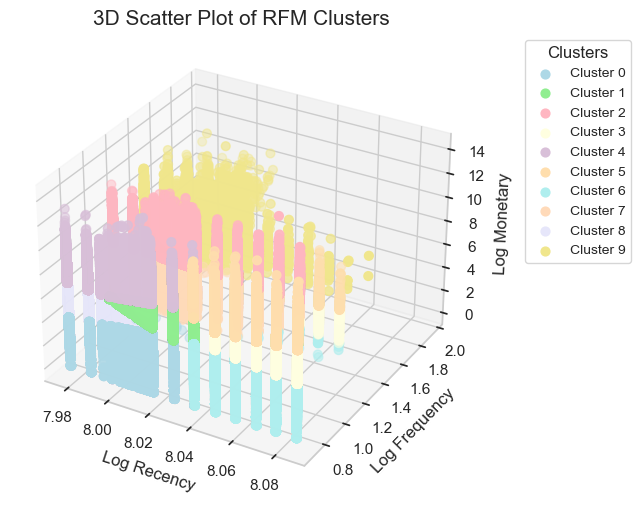

In [245]:
# Define a custom palette with 10 distinguishable colors
colors = ['#ADD8E6', '#90EE90', '#FFB6C1', '#FFFFE0', '#D8BFD8', '#FFDEAD', '#AFEEEE', '#FFDAB9', '#E6E6FA', '#F0E68C']

# Ensure that the number of colors is at least as many as the number of clusters
num_clusters = rfmdataframe['Cluster'].nunique()

# If there are more clusters than colors, loop through the colors list again
colors = colors * (num_clusters // len(colors)) + colors[:num_clusters % len(colors)]

# 3D Scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster
for cluster in range(num_clusters):
    cluster_data = rfmdataframe[rfmdataframe['Cluster'] == cluster]
    ax.scatter(
        cluster_data['LogRecency'], 
        cluster_data['LogFrequency'], 
        cluster_data['LogMonetary'], 
        label=f'Cluster {cluster}',
        color=colors[cluster],
        s=40  # Marker size
    )

# Add labels and legend
ax.set_title("3D Scatter Plot of RFM Clusters", fontsize=15)
ax.set_xlabel("Log Recency", fontsize=12)
ax.set_ylabel("Log Frequency", fontsize=12)
ax.set_zlabel("Log Monetary", fontsize=12)
ax.legend(title="Clusters", fontsize=10, loc='upper left', bbox_to_anchor=(1.1, 1))

# Show the plot
plt.show()


In [247]:
# Assuming 'Cluster' is the column with K-Means cluster labels
# Grouping customers by their assigned cluster and summarizing RFM values
cluster_summary = rfmdataframe.groupby('Cluster').agg({
    'Recency': ['mean', 'std', 'min', 'max', 'median'],
    'Frequency': ['mean', 'std', 'min', 'max', 'median'],
    'Monetary': ['mean', 'std', 'min', 'max', 'median'],
    'CustomerID': 'count'  # Counting number of customers in each cluster
}).reset_index()

# Renaming columns for readability
cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]
cluster_summary.rename(columns={'CustomerID_count': 'Customer Count'}, inplace=True)

# Displaying the summary DataFrame
cluster_summary


,Cluster_,Recency_mean,Recency_std,Recency_min,Recency_max,Recency_median,Frequency_mean,Frequency_std,Frequency_min,Frequency_max,Frequency_median,Monetary_mean,Monetary_std,Monetary_min,Monetary_max,Monetary_median,Customer Count
0,0,3009.656414,30.819037,2911,3094,3017.0,1.000065,0.008087,1,2,1.0,54.397041,33.209472,0.00,141.15,50.000,107033
1,1,3030.910322,27.841905,2972,3095,3024.0,1.000000,0.000000,1,1,1.0,736.423233,367.348238,141.75,2186.00,655.500,185117
2,2,3004.890609,49.675915,2911,3187,3011.0,2.000000,0.000000,2,2,2.0,5848.617791,11574.120129,1122.50,724472.00,2919.500,59347
3,3,3193.353785,41.560324,3125,3247,3187.0,1.005371,0.073090,1,2,1.0,463.563349,278.732014,90.00,1473.00,399.000,80060
4,4,3000.226824,35.945296,2911,3095,3013.0,1.000000,0.000000,1,1,1.0,5834.107018,14310.407604,1028.00,1560034.99,2738.000,117073
5,5,3166.093067,47.074350,3094,3247,3156.0,1.007856,0.088286,1,2,1.0,4829.878798,11311.892067,776.00,720001.16,2250.000,53080
6,6,3162.429317,49.964163,3094,3247,3156.0,1.001484,0.038493,1,2,1.0,65.637521,42.590994,0.00,184.48,51.000,40434
7,7,2999.669113,47.607414,2911,3187,3003.0,2.000278,0.016675,2,3,2.0,662.444007,365.970670,11.00,1554.75,624.000,64717
8,8,2984.241236,37.746014,2911,3034,2996.0,1.000000,0.000000,1,1,1.0,303.849700,195.977388,61.00,1172.00,243.000,158770
9,9,2985.739133,41.627495,2911,3246,2996.0,3.109370,0.343074,3,6,3.0,4898.799015,11324.298505,78.00,550972.34,2376.195,18634


In [256]:
# Define a function to assign labels based on the cluster characteristics
def label_cluster(row):
    if row['Cluster'] == 0:
        return "Recently Active, Low Frequency, Low Value Customer"
    elif row['Cluster'] == 1:
        return "Moderately Active, Low Frequency, Moderate Value Customer"
    elif row['Cluster'] == 2:
        return "Moderately Active, Consistent Frequency, High Value Customer"
    elif row['Cluster'] == 3:
        return "Dormant, Low Frequency, High Value Customer"
    elif row['Cluster'] == 4:
        return "Recently Active, Low Frequency, High Value Customer"
    elif row['Cluster'] == 5:
        return "Dormant, Low Frequency, Moderate Value Customer"
    elif row['Cluster'] == 6:
        return "Dormant, Low Frequency, Negligible Value Customer"
    elif row['Cluster'] == 7:
        return "Recently Active, Moderate Frequency, Moderate Value Customer"
    elif row['Cluster'] == 8:
        return "Very Recently Active, Low Frequency, Low Value Customer"
    elif row['Cluster'] == 9:
        return "Recently Active, High Frequency, High Value Customer"
    else:
        return "Unknown"

# Create a new dataframe 'clusterdataframe' with the original RFM data and customer segment labels
clusterdataframe = rfmdataframe.copy()
clusterdataframe['Customer Segment'] = clusterdataframe.apply(label_cluster, axis=1)

# Display the updated dataframe with the new labels
clusterdataframe[['CustomerID', 'Cluster', 'Customer Segment']].head()


,CustomerID,Cluster,Customer Segment
0,C1010011,2,"Moderately Active, Consistent Frequency, High ..."
1,C1010012,1,"Moderately Active, Low Frequency, Moderate Val..."
2,C1010014,2,"Moderately Active, Consistent Frequency, High ..."
3,C1010018,0,"Recently Active, Low Frequency, Low Value Cust..."
4,C1010024,4,"Recently Active, Low Frequency, High Value Cus..."


In [258]:
print(clusterdataframe.columns)
print(banktransactionsdf.columns)

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'LogRecency',
       'LogFrequency', 'LogMonetary', 'Cluster', 'Customer Segment'],
      dtype='object')
Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount'],
      dtype='object')


In [260]:
# Merge 'clusterdataframe' with 'toplocations' to add the 'CustLocation' column
cluster_with_locations = clusterdataframe.merge(
    banktransactionsdf[['CustomerID', 'CustLocation']],
    on='CustomerID',
    how='left'
)

# Group by location and cluster to calculate customer counts
location_cluster_summary = (
    cluster_with_locations.groupby(['CustLocation', 'Cluster'])
    .size()
    .reset_index(name='Customer Count')
)

# Calculate total customers per location
location_totals = (
    cluster_with_locations.groupby('CustLocation')['CustomerID']
    .count()
    .reset_index(name='Total Customers')
)

# Merge total customers back to calculate percentages
location_cluster_summary = location_cluster_summary.merge(
    location_totals,
    on='CustLocation',
    how='left'
)
location_cluster_summary['Percentage'] = (
    location_cluster_summary['Customer Count'] / location_cluster_summary['Total Customers'] * 100
)

# Sort results for easier analysis
location_cluster_summary = location_cluster_summary.sort_values(
    by=['CustLocation', 'Percentage'],
    ascending=[True, False]
)

# Filter the summary to include only the top locations (from 'toplocations')
top_5_locations = toplocations['CustLocation'].tolist()
filtered_summary = location_cluster_summary[location_cluster_summary['CustLocation'].isin(top_5_locations)]

# Generate insights based on the top locations
for location in top_5_locations:
    location_data = filtered_summary[filtered_summary['CustLocation'] == location]
    most_common_cluster = location_data.iloc[0]['Cluster']
    least_common_cluster = location_data.iloc[-1]['Cluster']
    print(
        f"Location: {location}\n"
        f"  - Most Common Cluster: {most_common_cluster}\n"
        f"  - Least Common Cluster: {least_common_cluster}\n"
        f"  - Cluster Distribution:\n{location_data[['Cluster', 'Percentage']]}\n"
    )


Location: MUMBAI
  - Most Common Cluster: 1
  - Least Common Cluster: 6
  - Cluster Distribution:
       Cluster  Percentage
21812        1   19.110134
21819        8   14.633817
21815        4   13.408710
21813        2   12.470842
21818        7   11.356582
21814        3    7.806566
21811        0    6.930388
21816        5    6.042643
21820        9    5.437318
21817        6    2.803000

Location: NEW DELHI
  - Most Common Cluster: 1
  - Least Common Cluster: 6
  - Cluster Distribution:
       Cluster  Percentage
23953        1   18.369678
23960        8   14.168472
23956        4   13.390166
23954        2   12.349284
23959        7   11.521524
23952        0    8.456575
23955        3    7.123681
23957        5    5.721317
23961        9    5.655379
23958        6    3.243924

Location: BANGALORE
  - Most Common Cluster: 1
  - Least Common Cluster: 6
  - Cluster Distribution:
      Cluster  Percentage
3171        1   19.133100
3178        8   16.661149
3177        7   12.709215
